In [41]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.tree import plot_tree
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split #helps split data evenly and randomly
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn import preprocessing 
sb.set()

pd.options.display.max_rows = 999



#Logistics Regression


<AxesSubplot:xlabel='LIFE_EXPECTANCY', ylabel='LIFE_EXPECTANCY'>

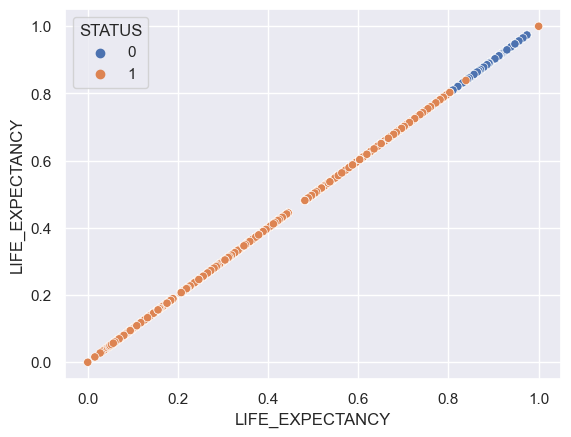

In [81]:
sb.scatterplot(x= lifeTransform["LIFE_EXPECTANCY"], y= lifeTransform["LIFE_EXPECTANCY"] , hue= lifeTransform["STATUS"])

<AxesSubplot:xlabel='LIFE_EXPECTANCY', ylabel='LIFE_EXPECTANCY'>

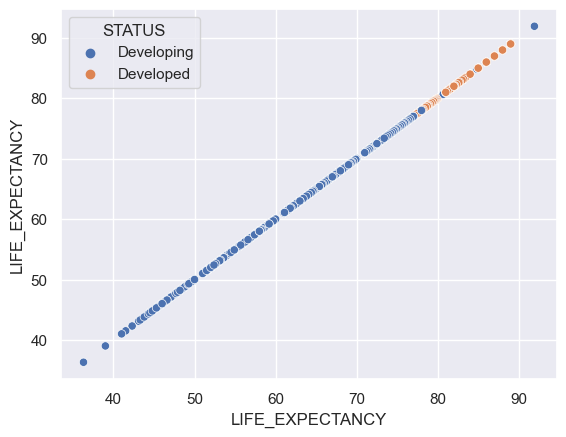

In [82]:
life_filled=pd.read_csv("dataset/life_filled.csv")
sb.scatterplot(x= life_filled["LIFE_EXPECTANCY"], y= life_filled["LIFE_EXPECTANCY"] , hue=life_filled["STATUS"])

As can see here, Developed countries seem to have a greater life expectancy, hence we will use logistics regression to understand 

In [83]:
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import make_classification


In [84]:
LogsRegDF = pd.read_csv("dataset/life_transform.csv")
print("Data dimensions", LogsRegDF.shape)
LogsRegDF.head()

Data dimensions (2938, 22)


,Unnamed: 0,COUNTRY,STATUS,YEAR,LIFE_EXPECTANCY,ADULT_MORTALITY,INFANT_DEATHS,ALCOHOL,PERCENTAGE_EXPENDITURE,HEPATITIS_B,...,UNDER_FIVE_DEATHS,POLIO,TOTAL_EXPENDITURE,DIPHTHERIA,HIV/AIDS,GDP,POPULATION,THINNESS_5_to_19_YEARS,INCOME_COMPOSITION_OF_RESOURCES,SCHOOLING
0,0,Afghanistan,1,2015.0,0.294686,0.802268,0.606280,-1.540089,-0.653537,0.317298,...,0.616162,0.006410,0.562634,0.171717,0.0,-0.765913,0.695802,1.863475,0.215278,10.1
1,1,Afghanistan,1,2014.0,0.187396,0.813152,0.611111,-1.540089,-0.641558,0.293245,...,0.621212,0.127778,0.567017,0.156566,0.0,-0.745047,-0.642920,1.881842,0.211111,10.0
2,2,Afghanistan,1,2013.0,0.187396,0.809070,0.615942,-1.540089,-0.643161,0.309280,...,0.626263,0.150000,0.556038,0.166667,0.0,-0.731598,0.674292,1.896363,0.202778,9.9
3,3,Afghanistan,1,2012.0,0.180763,0.814512,0.623188,-1.540089,-0.617785,0.333333,...,0.632997,0.177778,0.639925,0.181818,0.0,-0.705787,-0.011252,1.914304,0.193056,9.8
4,4,Afghanistan,1,2011.0,0.175788,0.818594,0.628019,-1.540089,-1.506529,0.340278,...,0.639731,0.183333,0.497836,0.186869,0.0,-1.725140,-0.073218,1.932018,0.180556,9.5


In [86]:
logsRegPred = pd.DataFrame(LogsRegDF[["SCHOOLING", "STATUS"]])
logsRegPred.head(n = 1000)

,SCHOOLING,STATUS
0,10.1,1
1,10.0,1
2,9.9,1
3,9.8,1
4,9.5,1
...,...,...
995,17.0,0
996,16.9,0
997,16.9,0
998,16.8,0


In [87]:
logsRegPred.shape


(2938, 2)

In [88]:
Schooling = pd.DataFrame(LogsRegDF["SCHOOLING"])
CountryStatus = pd.DataFrame(LogsRegDF["STATUS"])


In [123]:
CountryStatus = pd.get_dummies(CountryStatus, drop_first = False)
CountryStatus['STATUS'] = 1 - CountryStatus['STATUS']
#@CountryStatus.sample(n=5)
#CountryStatus["STATUS"]  = CountryStatus["STATUS"].replace({1:0, 0:1})
CountryStatus
#df_dummies['A_1'] = 1 - df_dummies['A_1']

,STATUS
0,0
1,0
2,0
3,0
4,0
...,...
2933,0
2934,0
2935,0
2936,0


# 1 Means Country is Considered As Developed
# 0 Means Country is Considered As Developing

In [125]:
CountryStatus.dtypes

STATUS    int64
dtype: object

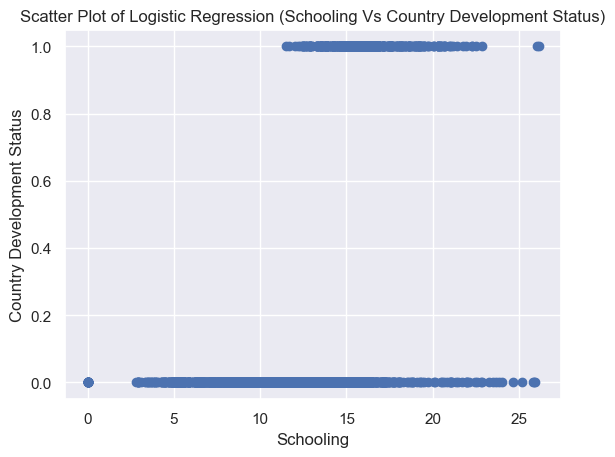

In [126]:
#colors = ['red' if CountryStatus == 1 else 'yellow']
plt.scatter(Schooling, CountryStatus,  cmap='Rainbow')
plt.xlabel ("Schooling")
plt.ylabel("Country Development Status")

plt.title('Scatter Plot of Logistic Regression (Schooling Vs Country Development Status)')
#plt.plot(Schooling, linreg.predict([["Schooling"]]), color = "green")
plt.show()

In [127]:
SchoolingTrain, SchoolingTest, CountryStatusTrain, CountryStatusTest = train_test_split(Schooling, CountryStatus, test_size = 0.25)

In [128]:
LogReg = LogisticRegression(max_iter=2938)

In [129]:
LogReg.fit(SchoolingTrain, CountryStatusTrain)

C:\Users\lotzi\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(max_iter=2938)

In [159]:
#Try to predict citizen in a certain country with 20 years of schooling vs 2 year of schooling
x = LogReg.predict(np.array([[20]]))[0]
if x==1:
    status = "Developed"
else:
    status = "Developing"
print("citizen with 20 years schooling will most likely live in", status, "Country")

x = LogReg.predict(np.array([[2]]))[0]
if x==1:
    status = "Developed"
else:
    status = "Developing"
print("citizen with 2 years schooling will most likely live in", status, "Country")

citizen with 20 years schooling will most likely live in Developed Country
citizen with 2 years schooling will most likely live in Developing Country


C:\Users\lotzi\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
C:\Users\lotzi\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


#multi variate logs regression


In [131]:
LogsRegDF.drop(columns=LogsRegDF.columns[0],axis=1,inplace=True)
LogsRegDF.head()

,STATUS,YEAR,LIFE_EXPECTANCY,ADULT_MORTALITY,INFANT_DEATHS,ALCOHOL,PERCENTAGE_EXPENDITURE,HEPATITIS_B,MEASLES,BMI,UNDER_FIVE_DEATHS,POLIO,TOTAL_EXPENDITURE,DIPHTHERIA,HIV/AIDS,GDP,POPULATION,THINNESS_5_to_19_YEARS,INCOME_COMPOSITION_OF_RESOURCES,SCHOOLING
0,0,2015.0,0.294686,0.802268,0.606280,-1.540089,-0.653537,0.317298,0.806913,19.1,0.616162,0.006410,0.562634,0.171717,0.0,-0.765913,0.695802,1.863475,0.215278,10.1
1,0,2014.0,0.187396,0.813152,0.611111,-1.540089,-0.641558,0.293245,0.766886,18.6,0.621212,0.127778,0.567017,0.156566,0.0,-0.745047,-0.642920,1.881842,0.211111,10.0
2,0,2013.0,0.187396,0.809070,0.615942,-1.540089,-0.643161,0.309280,0.749863,18.1,0.626263,0.150000,0.556038,0.166667,0.0,-0.731598,0.674292,1.896363,0.202778,9.9
3,0,2012.0,0.180763,0.814512,0.623188,-1.540089,-0.617785,0.333333,0.883365,17.6,0.632997,0.177778,0.639925,0.181818,0.0,-0.705787,-0.011252,1.914304,0.193056,9.8
4,0,2011.0,0.175788,0.818594,0.628019,-1.540089,-1.506529,0.340278,0.888946,17.2,0.639731,0.183333,0.497836,0.186869,0.0,-1.725140,-0.073218,1.932018,0.180556,9.5


In [132]:
LogsRegDF.dtypes

STATUS                               int64
YEAR                               float64
LIFE_EXPECTANCY                    float64
ADULT_MORTALITY                    float64
INFANT_DEATHS                      float64
ALCOHOL                            float64
PERCENTAGE_EXPENDITURE             float64
HEPATITIS_B                        float64
MEASLES                            float64
BMI                                float64
UNDER_FIVE_DEATHS                  float64
POLIO                              float64
TOTAL_EXPENDITURE                  float64
DIPHTHERIA                         float64
HIV/AIDS                           float64
GDP                                float64
POPULATION                         float64
THINNESS_5_to_19_YEARS             float64
INCOME_COMPOSITION_OF_RESOURCES    float64
SCHOOLING                          float64
dtype: object

In [133]:

LogsRegDF['STATUS'] = 1 - LogsRegDF['STATUS']
#LogsRegDF = pd.concat([LogsRegDF, LogsRegDF_dummies], axis=1)
#LogsRegDF.drop(['STATUS'], axis=1, inplace=True)
LogsRegDF

,STATUS,YEAR,LIFE_EXPECTANCY,ADULT_MORTALITY,INFANT_DEATHS,ALCOHOL,PERCENTAGE_EXPENDITURE,HEPATITIS_B,MEASLES,BMI,UNDER_FIVE_DEATHS,POLIO,TOTAL_EXPENDITURE,DIPHTHERIA,HIV/AIDS,GDP,POPULATION,THINNESS_5_to_19_YEARS,INCOME_COMPOSITION_OF_RESOURCES,SCHOOLING
0,1,2015.0,0.294686,0.802268,0.606280,-1.540089,-0.653537,0.317298,0.806913,19.1,0.616162,0.006410,0.562634,0.171717,0.000000,-0.765913,0.695802,1.863475,0.215278,10.1
1,1,2014.0,0.187396,0.813152,0.611111,-1.540089,-0.641558,0.293245,0.766886,18.6,0.621212,0.127778,0.567017,0.156566,0.000000,-0.745047,-0.642920,1.881842,0.211111,10.0
2,1,2013.0,0.187396,0.809070,0.615942,-1.540089,-0.643161,0.309280,0.749863,18.1,0.626263,0.150000,0.556038,0.166667,0.000000,-0.731598,0.674292,1.896363,0.202778,9.9
3,1,2012.0,0.180763,0.814512,0.623188,-1.540089,-0.617785,0.333333,0.883365,17.6,0.632997,0.177778,0.639925,0.181818,0.000000,-0.705787,-0.011252,1.914304,0.193056,9.8
4,1,2011.0,0.175788,0.818594,0.628019,-1.540089,-1.506529,0.340278,0.888946,17.2,0.639731,0.183333,0.497836,0.186869,0.000000,-1.725140,-0.073218,1.932018,0.180556,9.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2933,1,2004.0,0.046784,1.000000,0.484848,0.149101,1.081648,0.340278,0.547009,27.1,0.534188,0.177778,0.321024,0.171717,0.959553,-0.876123,0.368261,1.109933,0.115278,9.2
2934,1,2003.0,0.047953,0.997757,0.479798,0.088457,1.061102,0.018072,0.799610,26.7,0.529915,0.008547,0.161034,0.186869,0.966928,-0.877103,0.364611,1.166410,0.130556,9.5
2935,1,2002.0,0.049708,0.248889,0.474747,0.162786,-2.312958,0.375000,0.715266,26.3,0.525641,0.211111,0.163773,0.202020,0.974304,-1.768514,-0.857872,-0.981848,0.143056,10.0
2936,1,2001.0,0.052632,0.989627,0.474747,-0.554276,-2.312958,0.395833,0.777046,25.9,0.521368,0.233333,0.059581,0.222222,0.979776,-0.793556,0.357704,-0.744249,0.143056,9.8


In [134]:
# Extract Response and Predictors
y = pd.DataFrame(LogsRegDF['STATUS'])
X = pd.DataFrame(LogsRegDF.loc[:,~LogsRegDF.columns.isin(['STATUS','COUNTRY','LIFE_EXPECTANCY'])])

# Split the Dataset into random Train and Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2,random_state=0) # set the seed so its reproduceable
# Check the sample sizes
print("Train Set :", X_train.shape, y_train.shape)
print("Test Set  :", X_test.shape, y_test.shape)

Train Set : (2350, 18) (2350, 1)
Test Set  : (588, 18) (588, 1)


In [135]:
print("Shape of x ", X.shape)
y_train.size

Shape of x  (2938, 18)


2350

In [136]:
mymodel = LogisticRegression(max_iter = 2350)
mymodel.fit(X_train, y_train)
#print('Intercept \t: b = ', LogReg.intercept_)
#print('Coefficients \t: a = ', LogReg.coef_)

C:\Users\lotzi\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(max_iter=2350)

In [137]:
mymodel.score(X_train, y_train)

0.9259574468085107

In [138]:
ytest_pred = mymodel.predict(X_test)
ytest_pred

array([1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [139]:
mymodel.score(X_test, y_test)

0.923469387755102

<AxesSubplot:>

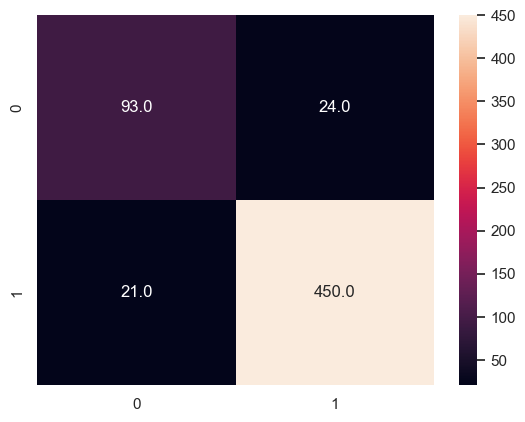

In [140]:
sb.heatmap(confusion_matrix(y_test, ytest_pred), annot = True, fmt = ".1f")

In [141]:
print("Test Data")
print("Accuracy  :\t", mymodel.score(X_test, y_test))
print()

# Print the Accuracy Measures from the Confusion Matrix
cmTest = confusion_matrix(y_test, ytest_pred)
tpTest = cmTest[1][1] # True Positives : Y (1) predicted Y (1)
fpTest = cmTest[0][1] # False Positives : N (0) predicted Y (1)
tnTest = cmTest[0][0] # True Negatives : N (0) predicted N (0)
fnTest = cmTest[1][0] # False Negatives : Y (1) predicted N (0)

print("TPR Test :\t", (tpTest/(tpTest + fnTest)))
print("TNR Test :\t", (tnTest/(tnTest + fpTest)))
print()

print("FPR Test :\t", (fpTest/(fpTest + tnTest)))
print("FNR Test :\t", (fnTest/(fnTest + tpTest)))

Test Data
Accuracy  :	 0.923469387755102

TPR Test :	 0.9554140127388535
TNR Test :	 0.7948717948717948

FPR Test :	 0.20512820512820512
FNR Test :	 0.044585987261146494


In [142]:
mean_squared_error(y_test, ytest_pred)

0.07653061224489796